In [316]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install seaborn
%pip install matplotlib
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [317]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [318]:
pd.options.display.float_format = '{:,.2f}'.format

In [319]:
df_data = pd.read_csv('rents_clean.csv/rents_clean.csv')

In [320]:
df_data.shape

(126237, 33)

In [321]:
df_data.columns

Index(['regione', 'citta', 'quartiere', 'prezzo', 'datetime', 'posti auto',
       'bagni per stanza', 'bagni', 'stanze', 'ultimo piano', 'stato',
       'classe energetica', 'vista mare', 'riscaldamento centralizzato',
       'superficie', 'arredato', 'balcone', 'impianto tv',
       'esposizione esterna', 'fibra ottica', 'cancello elettrico', 'cantina',
       'giardino comune', 'giardino privato', 'impianto allarme', 'portiere',
       'piscina', 'villa', 'intera proprieta', 'appartamento', 'attico',
       'loft', 'mansarda'],
      dtype='object')

In [322]:
df_data.columns = ['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
                   'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
                   'energy class', 'sea view', 'central heating', 'area', 'furnished',
                   'balcony', 'TV system', 'external exposure', 'fiber optic', 'electric gate',
                   'cellar', 'shared garden', 'private garden', 'alarm system', 'doorman',
                   'pool', 'villa', 'entire property', 'apartment', 'penthouse', 'loft', 'attic']

In [323]:
df_data.duplicated().values.any()

np.True_

In [324]:
df_data[df_data.duplicated(keep=False)].sort_values('city')


region             city              neighborhood  price  \
47959   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
47919   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
73887     sicilia        Agrigento             Via Empedocle 400.00   
7799      sicilia        Agrigento                ViaMinerva 750.00   
72427     sicilia        Agrigento             Via Empedocle 400.00   
...           ...              ...                       ...    ...   
67710    piemonte           Vinovo                 Via Nessa 695.00   
12724      veneto  Vittorio Veneto           Via del Maniero 650.00   
12850      veneto  Vittorio Veneto           Via del Maniero 650.00   
121876      lazio         Zagarolo            Via del Cinema 550.00   
121490      lazio         Zagarolo            Via del Cinema 550.00   

          datetime  parking spots  bathrooms per room  bathrooms  rooms  \
47959   2023-05-19              0                0.50       1.00   2.00   
47919   2023-05-19              0                0.50       1.00   2.00   
73887   2023-08-06              0                0.50       1.00   2.00   
7799    2023-03-21              1                0.50       2.00   4.00   
72427   2023-08-06              0                0.50       1.00   2.00   
...            ...            ...                 ...        ...    ...   
67710   2023-05-06              0                0.50       2.00   4.00   
12724   2023-03-04              1                0.50       1.00   2.00   
12850   2023-03-04              1                0.50       1.00   2.00   
121876  2023-07-24              0                1.00       1.00   1.00   
121490  2023-07-24              0                1.00       1.00   1.00   

        top floor  ... private garden alarm system  doorman  pool  villa  \
47959           0  ...              0            0        0     0      0   
47919           0  ...              0            0        0     0      0   
73887           0  ...              0            0        0     0      0   
7799            0  ...              0            0        0     0      0   
72427           0  ...              0            0        0     0      0   
...           ...  ...            ...          ...      ...   ...    ...   
67710           0  ...              1            0        0     0      0   
12724           0  ...              0            0        0     0      0   
12850           0  ...              0            0        0     0      0   
121876          0  ...              0            0        0     0      0   
121490          0  ...              0            0        0     0      0   

        entire property  apartment  penthouse  loft  attic  
47959                 0          1          0     0      0  
47919                 0          1          0     0      0  
73887                 0          1          0     0      0  
7799                  0          1          0     0      0  
72427                 0          1          0     0      0  
...                 ...        ...        ...   ...    ...  
67710                 0          1          0     0      0  
12724                 0          1          0     0      0  
12850                 0          1          0     0      0  
121876                0          1          0     0      0  
121490                0          1          0     0      0  

[2869 rows x 33 columns]

In [325]:
df_data = df_data.drop_duplicates()

In [326]:
df_data.isna().sum()

region                   12
city                     15
neighborhood           7410
price                  5688
datetime                  0
parking spots             0
bathrooms per room    10669
bathrooms              4052
rooms                  8503
top floor                 0
condition              8276
energy class          24148
sea view                112
central heating       18373
area                   9731
furnished                 0
balcony                   0
TV system                 0
external exposure         0
fiber optic               0
electric gate             0
cellar                    0
shared garden             0
private garden            0
alarm system              0
doorman                   0
pool                      0
villa                     0
entire property           0
apartment                 0
penthouse                 0
loft                      0
attic                     0
dtype: int64

In [327]:
df_data[df_data.isna().any(axis=1)]

region              city  \
0                         NaN            Milano   
1                         NaN            Torino   
2                         NaN            Padova   
3                         NaN           Firenze   
4                         NaN  Monte Argentario   
...                       ...               ...   
126204                sicilia           Palermo   
126206         emilia-Romagna           Bologna   
126210               calabria         Catanzaro   
126218  friuli-venezia-giulia           Trieste   
126233  friuli-venezia-giulia           Trieste   

                              neighborhood    price    datetime  \
0                                 Centrale 1,800.00  2023-07-03   
1                               Santa Rita   450.00  2023-07-03   
2           Prato della Valle - Pontecorvo 3,200.00  2023-07-03   
3                                 Galluzzo 1,700.00  2022-12-21   
4                  Località Poggio Pertuso 4,000.00  2023-06-03   
...                                    ...      ...         ...   
126204          Giotto Galilei - Palagonia 1,200.00  2023-07-27   
126206                               Barca 1,300.00  2023-07-27   
126210               Mater Domini - Cavita   450.00  2023-07-26   
126218                     Borgo Teresiano   850.00  2023-07-26   
126233  Largo Barriera - Ospedale Maggiore   620.00  2023-07-25   

        parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
0                   1                0.33       1.00   3.00          0  ...   
1                   0                0.50       1.00   2.00          1  ...   
2                   1                 NaN       3.00    NaN          0  ...   
3                   0                 NaN       3.00    NaN          1  ...   
4                   1                0.60       3.00   5.00          0  ...   
...               ...                 ...        ...    ...        ...  ...   
126204              0                 NaN       2.00    NaN          1  ...   
126206              0                0.67       2.00   3.00          0  ...   
126210              0                0.67       2.00   3.00          0  ...   
126218              0                2.00       4.00   2.00          0  ...   
126233              0                0.33       1.00   3.00          0  ...   

       private garden alarm system  doorman  pool  villa  entire property  \
0                   0            0        0     0      0                0   
1                   0            0        0     0      0                0   
2                   0            0        0     0      0                0   
3                   1            0        0     0      1                0   
4                   1            0        0     0      1                0   
...               ...          ...      ...   ...    ...              ...   
126204              0            0        0     0      0                0   
126206              0            0        0     0      0                0   
126210              0            0        0     0      0                0   
126218              0            0        0     0      0                0   
126233              0            0        0     0      0                0   

        apartment  penthouse  loft  attic  
0               1          0     0      0  
1               1          0     0      0  
2               1          0     0      0  
3               0          0     0      0  
4               0          0     0      0  
...           ...        ...   ...    ...  
126204          1          0     0      0  
126206          1          0     0      0  
126210          1          0     0      0  
126218          1          0     0      0  
126233          1          0     0      0  

[54369 rows x 33 columns]

In [328]:
df_data = df_data.dropna()

In [329]:
df_data.isna().sum()

region                0
city                  0
neighborhood          0
price                 0
datetime              0
parking spots         0
bathrooms per room    0
bathrooms             0
rooms                 0
top floor             0
condition             0
energy class          0
sea view              0
central heating       0
area                  0
furnished             0
balcony               0
TV system             0
external exposure     0
fiber optic           0
electric gate         0
cellar                0
shared garden         0
private garden        0
alarm system          0
doorman               0
pool                  0
villa                 0
entire property       0
apartment             0
penthouse             0
loft                  0
attic                 0
dtype: int64

In [330]:
df_data.shape

(70092, 33)

In [331]:
df_data.datetime = pd.to_datetime(df_data.datetime)
df_data.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                    float64
rooms                        float64
top floor                      int64
condition                     object
energy class                  object
sea view                     float64
central heating              float64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [332]:
df_data.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
12              0                0.50       1.00   2.00          1  ...   
13              0                1.00       1.00   1.00          0  ...   
15              1                0.50       1.00   2.00          0  ...   
16              0                0.33       1.00   3.00          0  ...   
19              0                0.33       1.00   3.00          0  ...   

   private garden alarm system  doorman  pool  villa  entire property  \
12              1            0        0     0      0                0   
13              0            0        0     0      0                0   
15              0            0        0     0      0                0   
16              0            0        0     0      0                0   
19              0            0        0     0      0                0   

    apartment  penthouse  loft  attic  
12          1          0     0      0  
13          1          0     0      0  
15          1          0     0      0  
16          1          0     0      0  
19          1          0     0      0  

[5 rows x 33 columns]

### Percentage of flats by each city

In [333]:
cities = df_data.city.value_counts()
fig = px.pie(labels=cities.index,
             values=cities.values,
             title="Percentage of of flats by each city",
             names=cities.index,
             hole=0.2,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.update_layout(width=1300, height=800)

fig.show(renderer='vscode')

### Average Distribution of Rent

In [334]:
df_data['price'].describe()

count      70,092.00
mean        1,234.70
std         8,251.34
min             1.00
25%           550.00
50%           760.00
75%         1,250.00
max     1,150,000.00
Name: price, dtype: float64

In [335]:
df_filtered_outliers = df_data[(df_data.price > 100) & (df_data.price < 2000) & (df_data.area > 10)]

In [336]:
# Change all float columns to int
df_filtered_outliers = df_filtered_outliers.astype({'bathrooms': 'int', 'rooms': 'int', 'parking spots': 'int', 'top floor': 'int', 'sea view': 'int', 'central heating': 'int',
                                                    'furnished': 'int', 'balcony': 'int', 'external exposure': 'int', 'fiber optic': 'int',
                                                    'electric gate': 'int', 'cellar': 'int', 'shared garden': 'int', 'private garden': 'int',
                                                    'pool': 'int', 'villa': 'int', 'apartment': 'int', 'penthouse': 'int', 'loft': 'int', 'attic': 'int'})

In [337]:
# Check data types of columns
df_filtered_outliers.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                      int64
rooms                          int64
top floor                      int64
condition                     object
energy class                  object
sea view                       int64
central heating                int64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [338]:
# Drop Columns with only one value
df_filtered_outliers.drop(['TV system', 'alarm system', 'doorman', 'entire property'], axis=1, inplace=True)

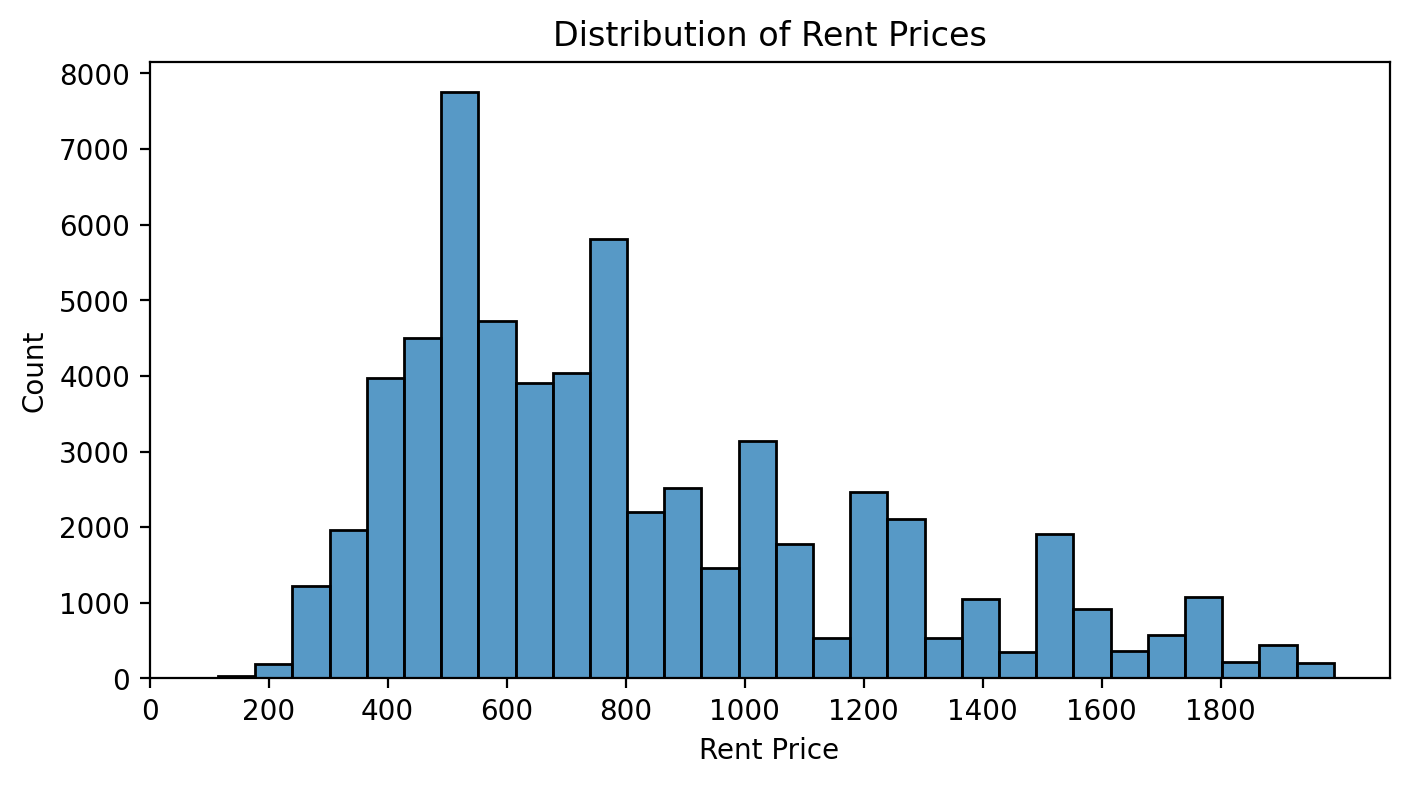

In [339]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_filtered_outliers,
             x=df_filtered_outliers.price,
             bins=30)
plt.xlabel('Rent Price')
plt.xticks(range(0, 2000, 200))
plt.title('Distribution of Rent Prices')
plt.show()

### Area vs Price

In [340]:
df_filtered_outliers['area'].describe()

count   61,953.00
mean        69.95
std         30.86
min         11.00
25%         50.00
50%         65.00
75%         85.00
max        300.00
Name: area, dtype: float64

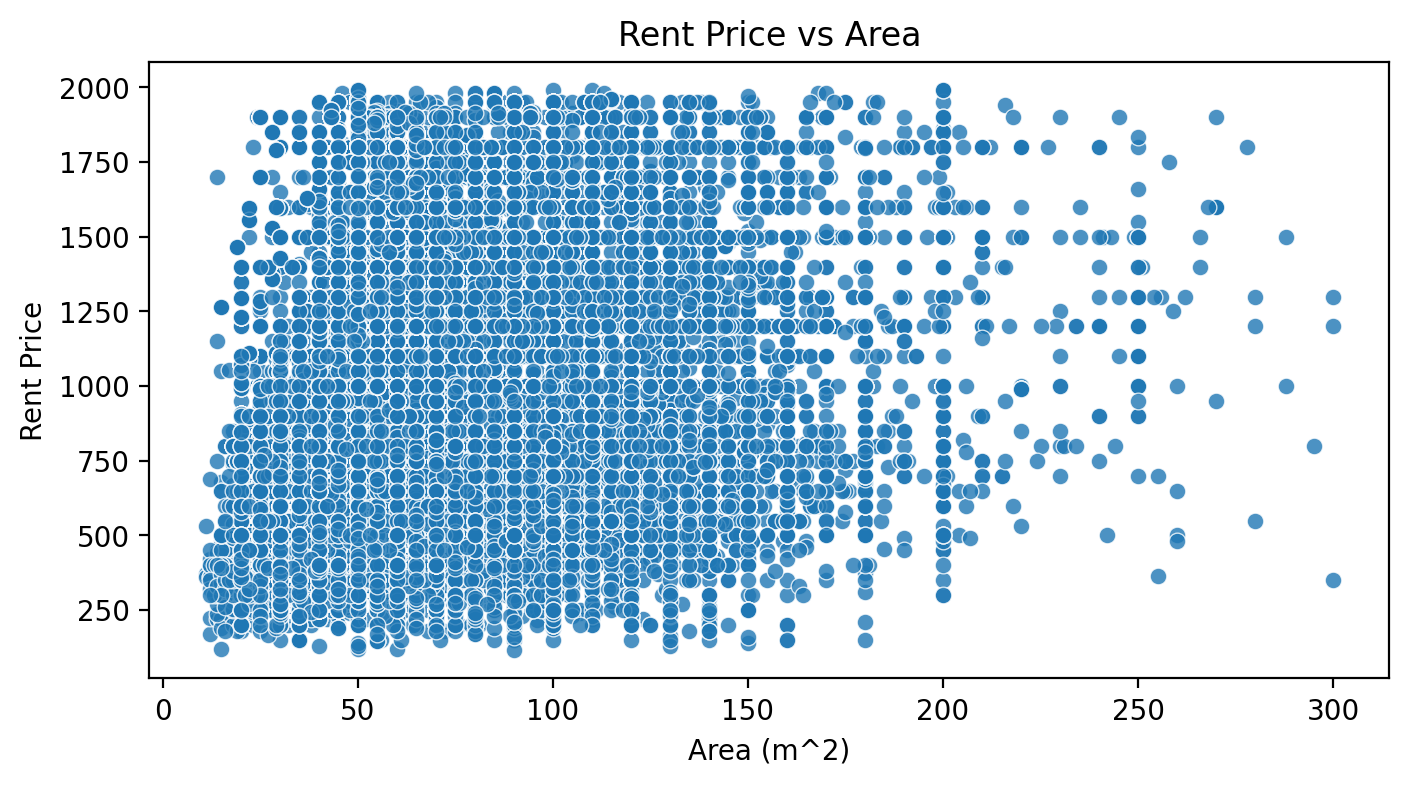

In [341]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df_filtered_outliers,
                x='area',
                y='price',
                alpha=0.8)

plt.xlabel('Area (m^2)')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Area')
plt.show()

In [342]:
df_data.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'TV system', 'external exposure', 'fiber optic',
       'electric gate', 'cellar', 'shared garden', 'private garden',
       'alarm system', 'doorman', 'pool', 'villa', 'entire property',
       'apartment', 'penthouse', 'loft', 'attic'],
      dtype='object')

### Property Count by Type

In [343]:
villa = df_filtered_outliers['villa'].sum()
apartment = df_filtered_outliers['apartment'].sum()
penthouse = df_filtered_outliers['penthouse'].sum()
loft = df_filtered_outliers['loft'].sum()
attic = df_filtered_outliers['attic'].sum()

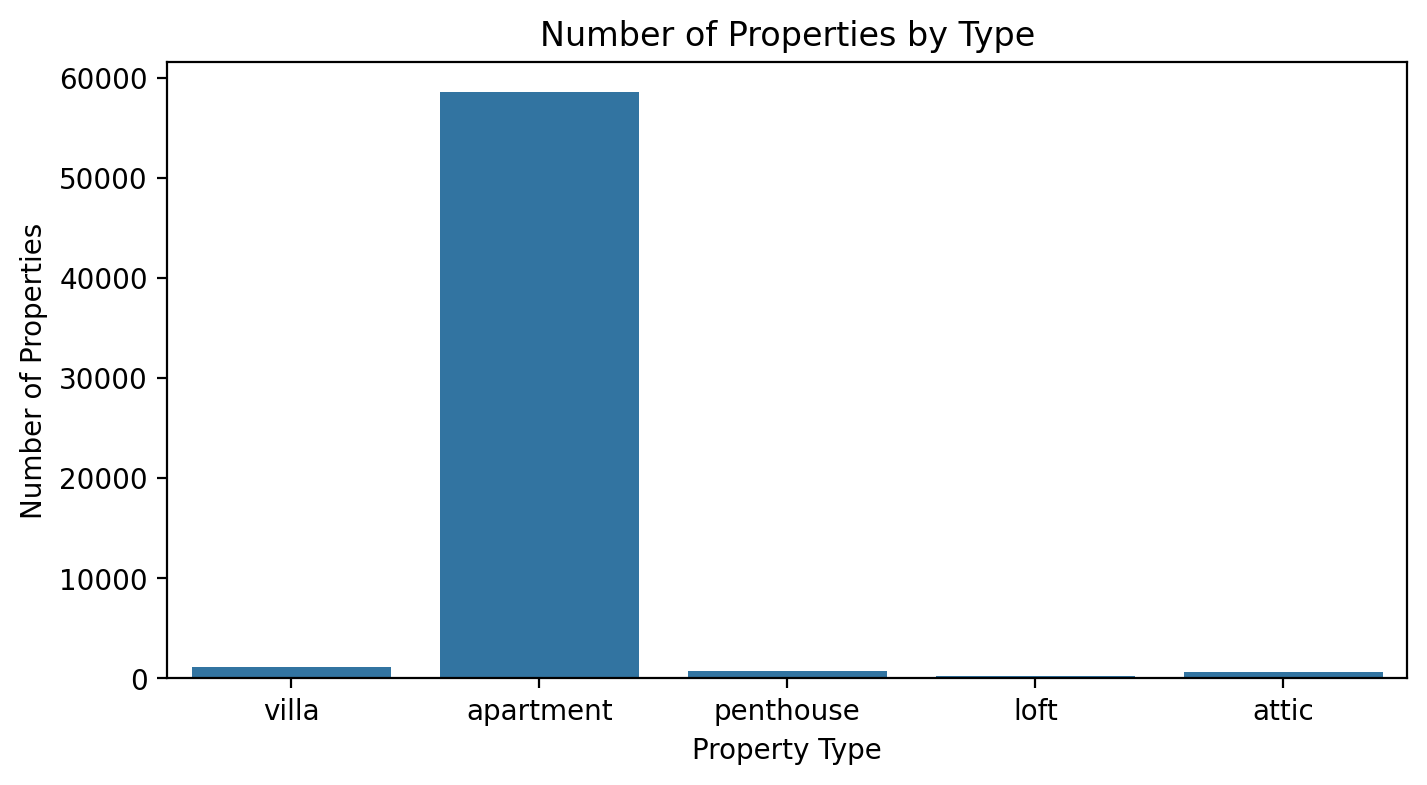

In [344]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=['villa', 'apartment', 'penthouse', 'loft', 'attic'],
            y=[villa, apartment, penthouse, loft, attic])
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Type')
plt.show()

### Average Rent by Property Type

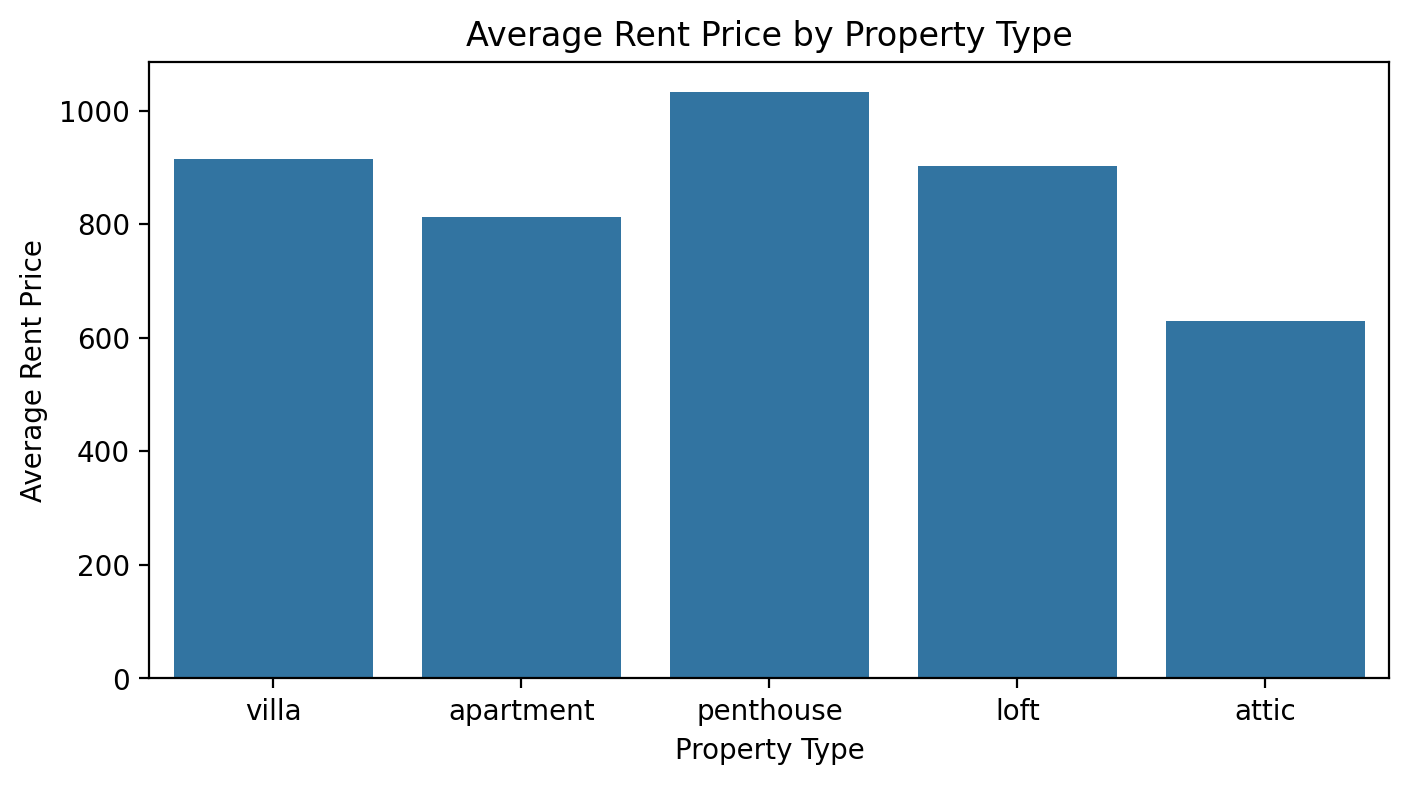

In [345]:
average_prices = {
    'villa': df_filtered_outliers[df_filtered_outliers['villa'] == 1]['price'].mean(),
    'apartment': df_filtered_outliers[df_filtered_outliers['apartment'] == 1]['price'].mean(),
    'penthouse': df_filtered_outliers[df_filtered_outliers['penthouse'] == 1]['price'].mean(),
    'loft': df_filtered_outliers[df_filtered_outliers['loft'] == 1]['price'].mean(),
    'attic': df_filtered_outliers[df_filtered_outliers['attic'] == 1]['price'].mean()
}

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=list(average_prices.keys()), y=list(average_prices.values()))
plt.xlabel('Property Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Property Type')
plt.show()

In [346]:
average_prices_by_region = df_filtered_outliers.groupby('region')['price'].mean().sort_values()
average_prices_by_region

region
Liguria                   350.00
l-aquila                  400.00
umbria                    477.74
genova                    504.29
molise                    543.63
basilicata                555.89
palermo                   565.00
calabria                  571.17
piemonte                  585.60
catanzaro                 595.94
marche                    613.81
puglia                    654.84
abruzzo                   659.91
sicilia                   666.54
liguria                   666.58
bari                      700.00
torino                    700.00
napoli                    750.00
campania                  757.39
valle-d-aosta             762.84
friuli-venezia-giulia     798.96
sardegna                  808.55
veneto                    810.18
emilia-romagna            829.46
lazio                     869.63
trentino-alto-adige       886.23
trieste                   904.82
toscana                   919.38
lombardia               1,061.84
emilia-Romagna          1,130.08
ven

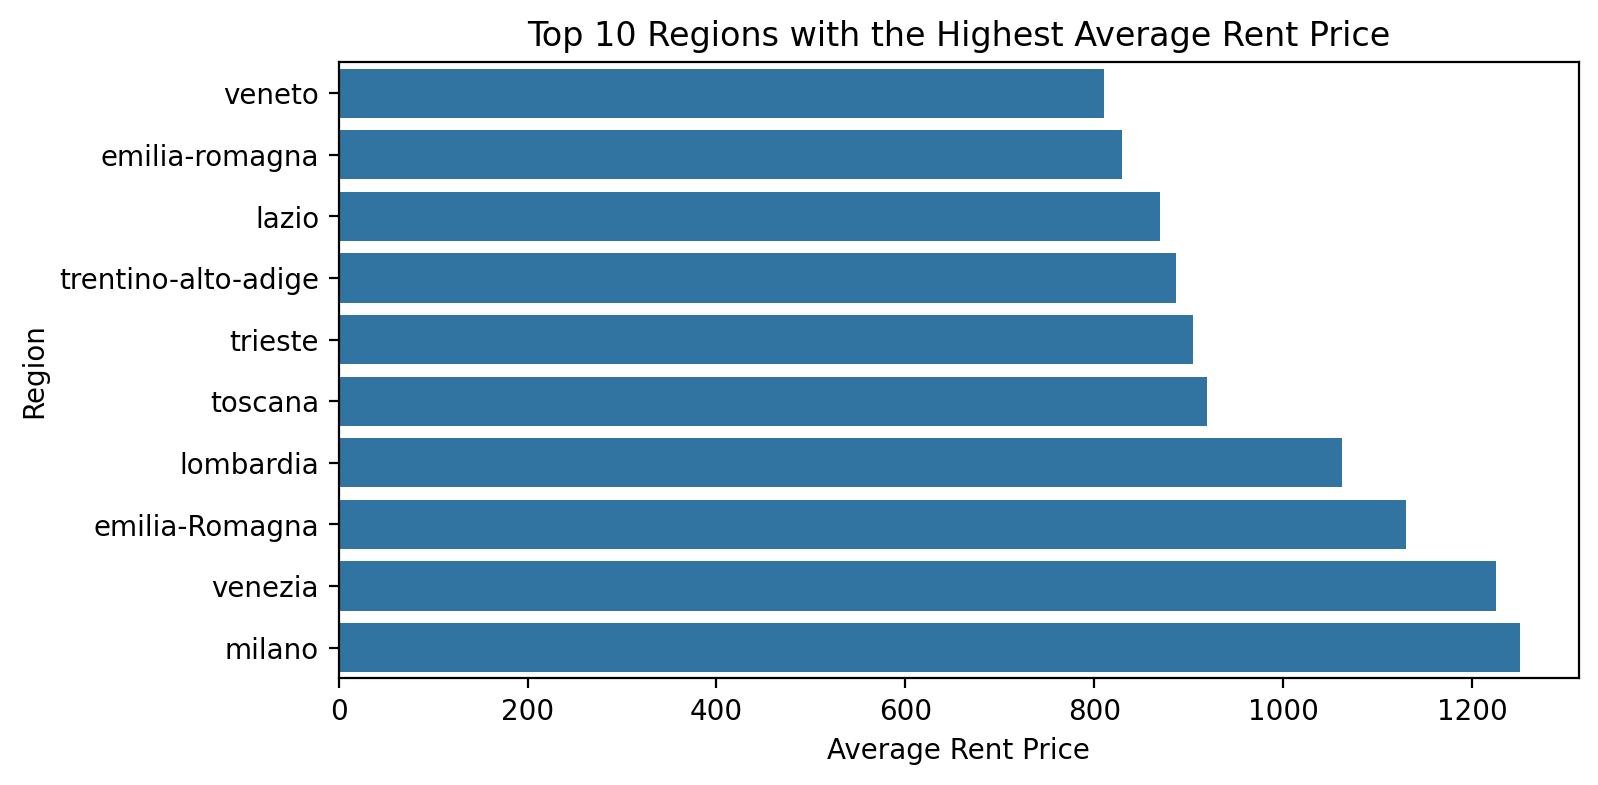

In [347]:
top_10_regions_high = average_prices_by_region.tail(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_high.values, y=top_10_regions_high.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()


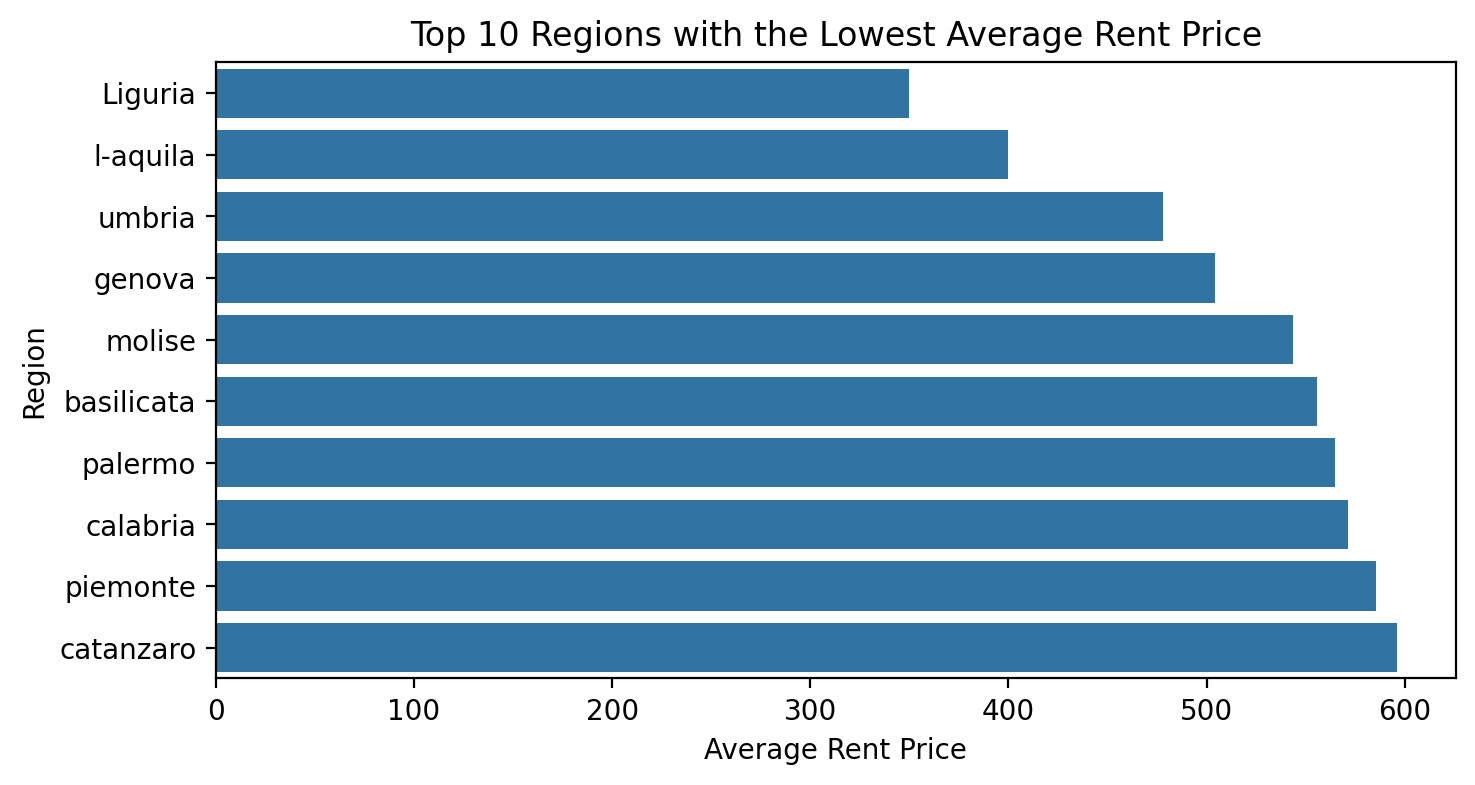

In [348]:
top_10_regions_low = average_prices_by_region.head(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_low.values, y=top_10_regions_low.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Lowest Average Rent Price')
plt.show()

In [349]:
fig = px.box(df_filtered_outliers, y='price')
fig.show()

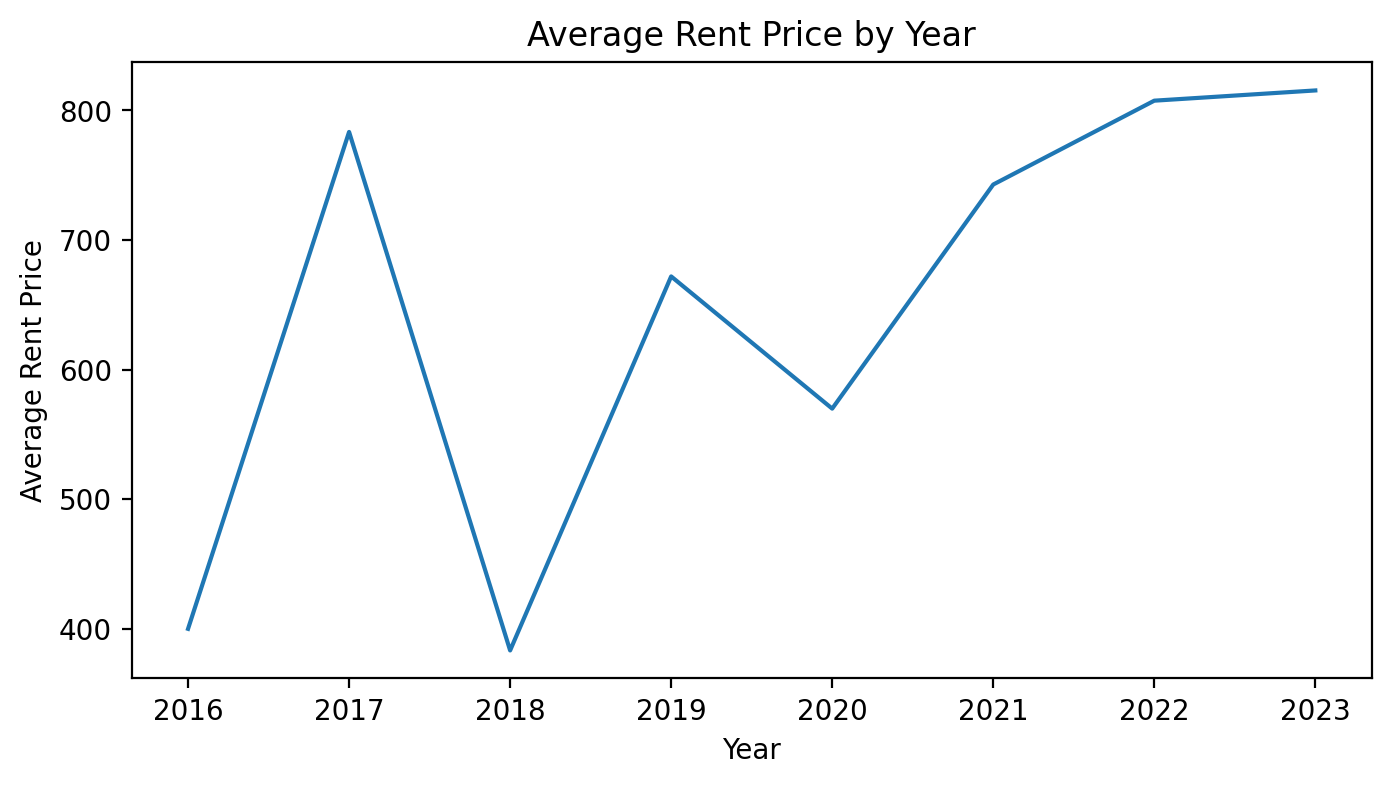

In [350]:
df_filtered_outliers['year'] = df_filtered_outliers.datetime.dt.year

average_prices_by_year = df_filtered_outliers.groupby('year')['price'].mean()

plt.figure(figsize=(8, 4), dpi=200)
sns.lineplot(x=average_prices_by_year.index, y=average_prices_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Year')
plt.show()


In [351]:
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['energy class'] != ',']

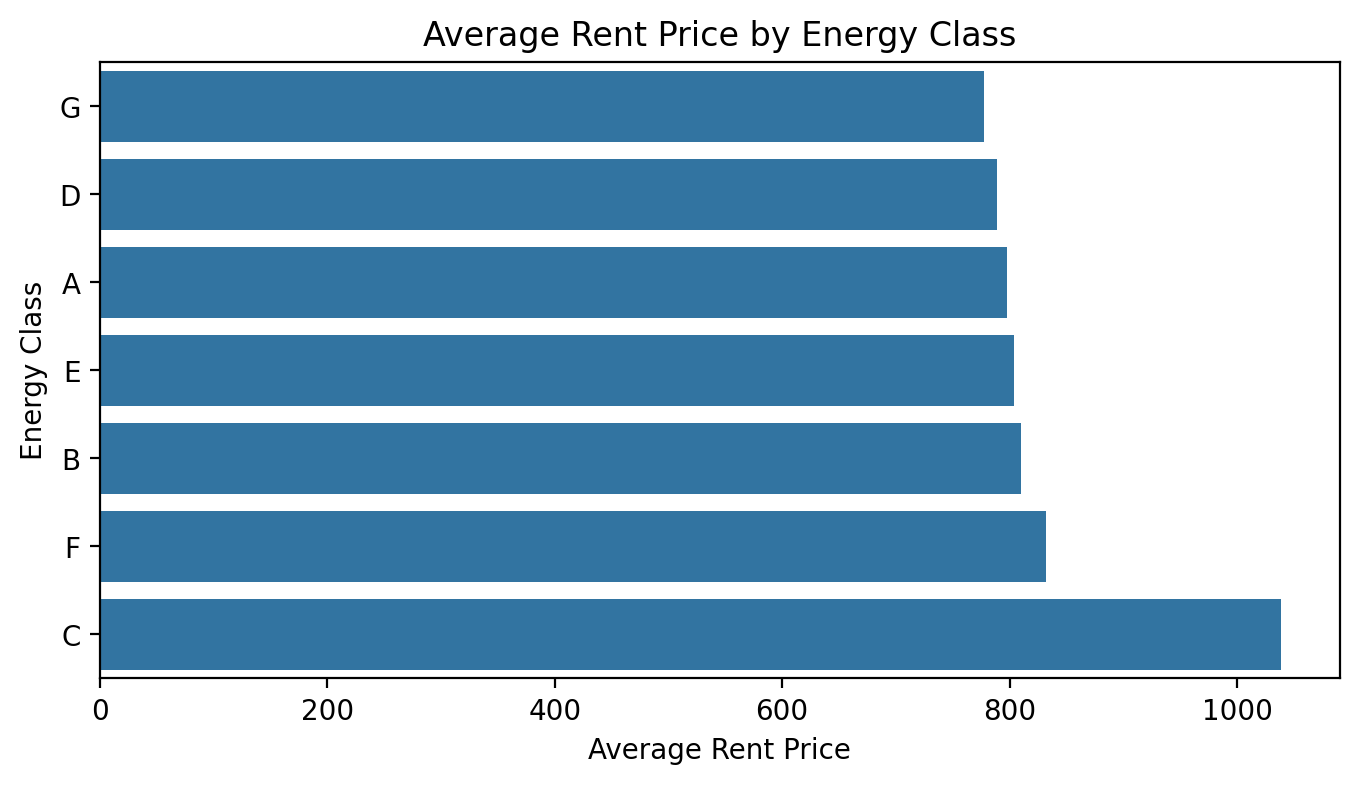

In [352]:
average_prices_by_energy_class = df_filtered_outliers.groupby('energy class')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_energy_class.values, y=average_prices_by_energy_class.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Energy Class')
plt.title('Average Rent Price by Energy Class')
plt.show()

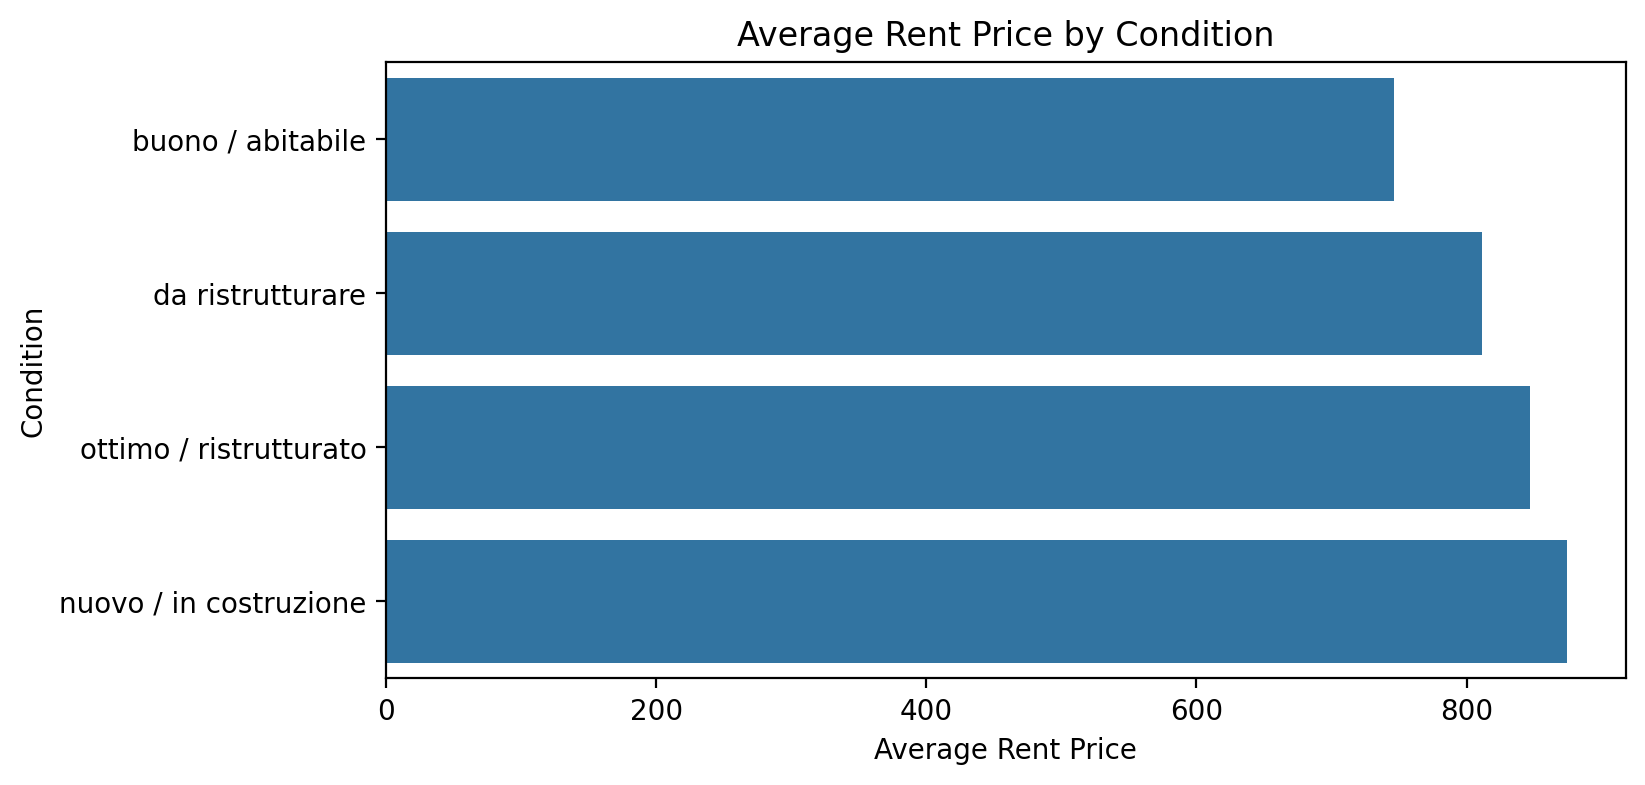

In [353]:
average_prices_by_condition = df_filtered_outliers.groupby('condition')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_condition.values, y=average_prices_by_condition.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Condition')
plt.title('Average Rent Price by Condition')
plt.show()

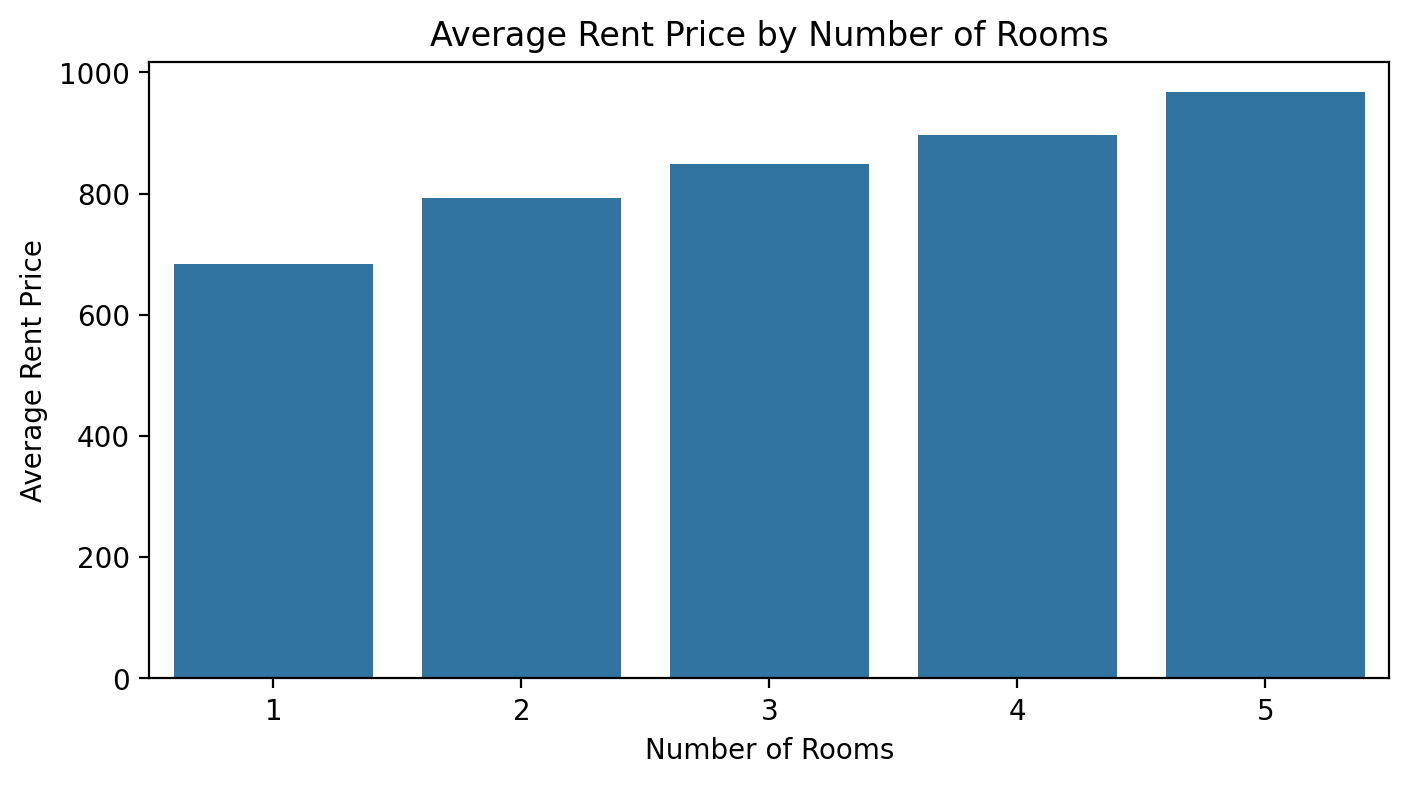

In [354]:
average_prices_by_rooms = df_filtered_outliers.groupby('rooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_rooms.index, y=average_prices_by_rooms.values)
plt.xlabel('Number of Rooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Rooms')
plt.show()

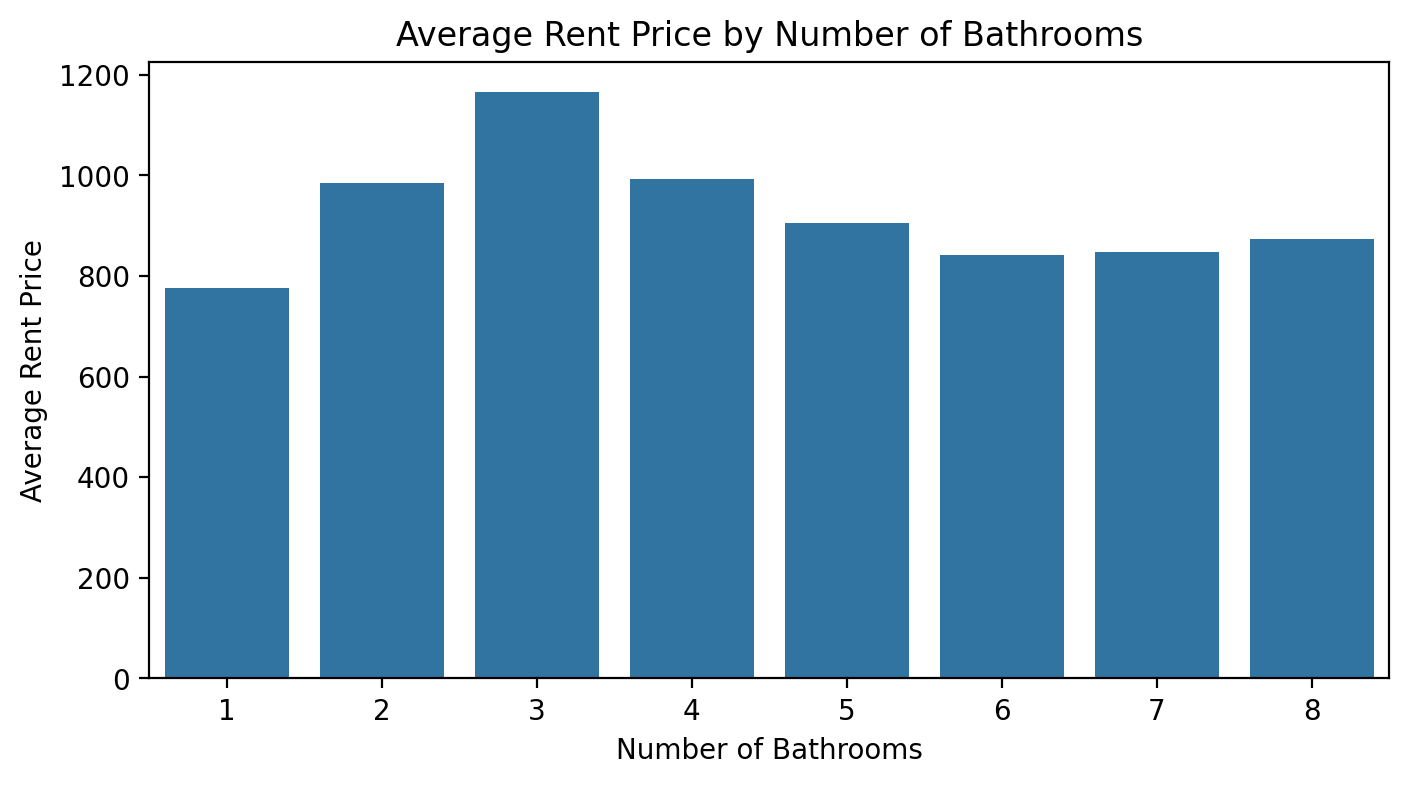

In [355]:
average_prices_by_bathrooms = df_filtered_outliers.groupby('bathrooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_bathrooms.index, y=average_prices_by_bathrooms.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Bathrooms')
plt.show()

### Regression Plot

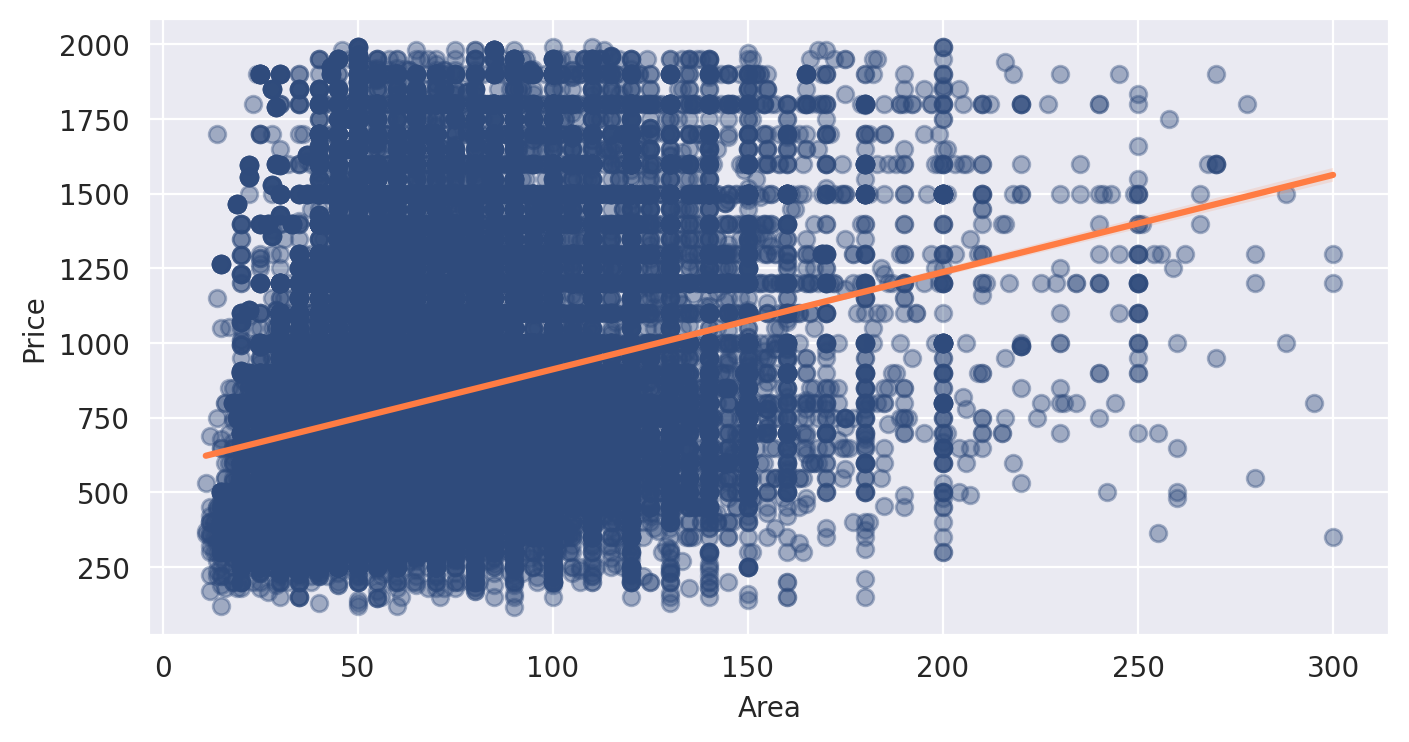

In [356]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax= sns.regplot(data=df_filtered_outliers,
            x='area',
            y='price',
            scatter_kws = {'alpha': 0.4,'color': "#2f4b7c"},
            line_kws = {'color': '#ff7c43'})


  ax.set(
        ylabel='Price',
        xlabel='Area',)


## Train Model using Linear Regression

In [357]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'external exposure', 'fiber optic', 'electric gate',
       'cellar', 'shared garden', 'private garden', 'pool', 'villa',
       'apartment', 'penthouse', 'loft', 'attic', 'year'],
      dtype='object')

In [360]:
# Temporarily drop the categorical columns
input_columns = df_filtered_outliers.drop(['region', 'city', 'neighborhood', 'price', 'datetime', 'year', 'bathrooms per room', 'condition', 'energy class'], axis=1).columns

In [361]:
input_columns

Index(['parking spots', 'bathrooms', 'rooms', 'top floor', 'sea view',
       'central heating', 'area', 'furnished', 'balcony', 'external exposure',
       'fiber optic', 'electric gate', 'cellar', 'shared garden',
       'private garden', 'pool', 'villa', 'apartment', 'penthouse', 'loft',
       'attic'],
      dtype='object')

In [362]:
regression = LinearRegression()

X = pd.DataFrame(df_filtered_outliers, columns=input_columns)
y = pd.DataFrame(df_filtered_outliers, columns=['price'])

regression.fit(X, y)

print(regression.intercept_)
print(regression.coef_)

[358.29077629]
[[-140.75056726   91.13608318   -8.62112661  -32.5478164    78.08890587
   136.58911636    4.11301745   67.05598908 -112.17512469   15.4479025
   124.81542865  -22.16563537  -58.09399658   34.47578993  -23.18099666
   205.3719969    48.7980582    55.38911532  200.95894106  123.23170603
   -67.62166685]]


In [363]:
regression.score(X, y)

0.19360000975228553

In [364]:
parking_spots = 0
bathrooms = 1
rooms = 2
top_floor = 0
sea_view = 0
central_heating = 1
area = 40
furnished = 0
balcony = 1
external_exposure = 1
fiber_optic = 0
electric_gate = 0
cellar = 0
shared_garden = 0
private_garden = 0
pool = 0
villa = 0
apartment = 1
penthouse = 0
loft = 0
attic = 0



price_estimate = (regression.intercept_[0] 
                    + regression.coef_[0,0] * parking_spots
                    + regression.coef_[0,1] * bathrooms
                    + regression.coef_[0,2] * rooms
                    + regression.coef_[0,3] * top_floor
                    + regression.coef_[0,4] * sea_view
                    + regression.coef_[0,5] * central_heating
                    + regression.coef_[0,6] * area
                    + regression.coef_[0,7] * furnished
                    + regression.coef_[0,8] * balcony
                    + regression.coef_[0,9] * external_exposure
                    + regression.coef_[0,10] * fiber_optic
                    + regression.coef_[0,11] * electric_gate
                    + regression.coef_[0,12] * cellar
                    + regression.coef_[0,13] * shared_garden
                    + regression.coef_[0,14] * private_garden
                    + regression.coef_[0,15] * pool
                    + regression.coef_[0,16] * villa
                    + regression.coef_[0,17] * apartment
                    + regression.coef_[0,18] * penthouse
                    + regression.coef_[0,19] * loft
                    + regression.coef_[0,20] * attic
                  )


print(f'The estimated rent price is around €{price_estimate:.10}.')

The estimated rent price is around €691.9563139.


## Prediction using DecesionTreeRegressor Algorithm

In [365]:
from sklearn.tree import DecisionTreeRegressor

In [366]:
X = pd.DataFrame(df_filtered_outliers, columns=input_columns)
y = pd.DataFrame(df_filtered_outliers, columns=['price'])

model = DecisionTreeRegressor()
model.fit(X, y)

prediction_input = [[parking_spots, bathrooms, rooms, top_floor, sea_view, central_heating, area, 
                     furnished, balcony, external_exposure, fiber_optic, electric_gate, cellar, 
                     shared_garden, private_garden, pool, villa, apartment, penthouse, loft, attic]]


prediction = model.predict(prediction_input)
print(prediction)

print(model.score(X, y))

[700.]
0.6907574276993766


e:\Work Study Files\Github Repos\italy-rent-prediction\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



### Data Training and Testing seperation

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
x = input_columns
y = df_filtered_outliers['price']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [370]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'parking spots'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'top floor'}>,
        <Axes: title={'center': 'sea view'}>],
       [<Axes: title={'center': 'central heating'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'external exposure'}>],
       [<Axes: title={'center': 'fiber optic'}>,
        <Axes: title={'center': 'electric gate'}>,
        <Axes: title={'center': 'cellar'}>,
        <Axes: title={'center': 'shared garden'}>,
        <Axes: title={'center': 'private garden'}>],
       [<Axes: title={'center': 'pool'}>,
        <Axes: title={'center': 'villa'}>,
        <Axes: title={'center': 'apartment'}>,
        <Axes: title={'center': 'penthouse'}>,
        <Axes: title={'center': 'loft'}>],
       [<Axes: title={'center': 'attic'}>,
        <

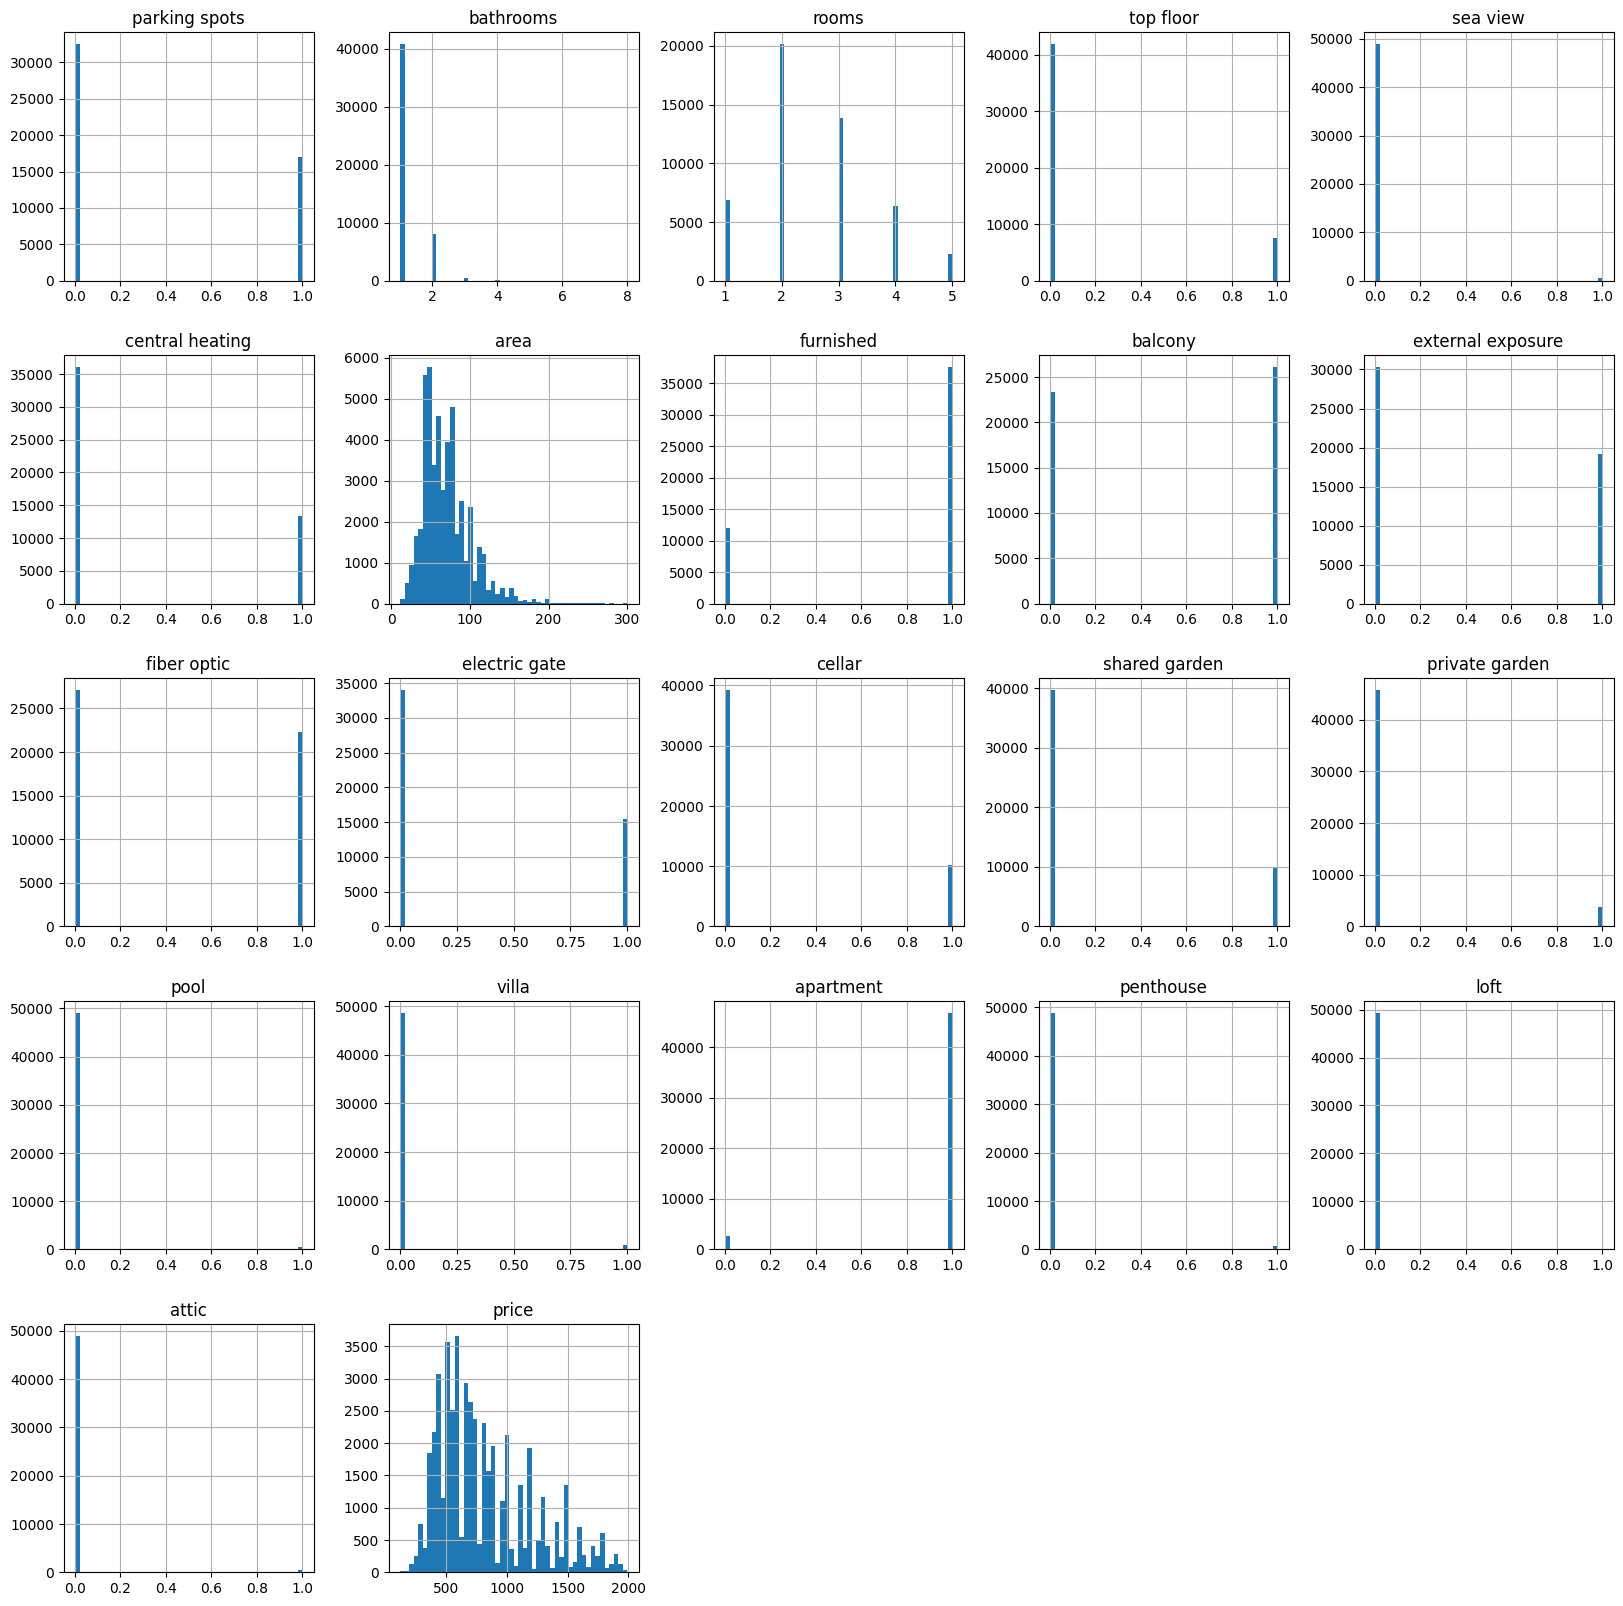

In [371]:
train_data.hist(figsize=(20, 20), bins=50)

<Axes: >

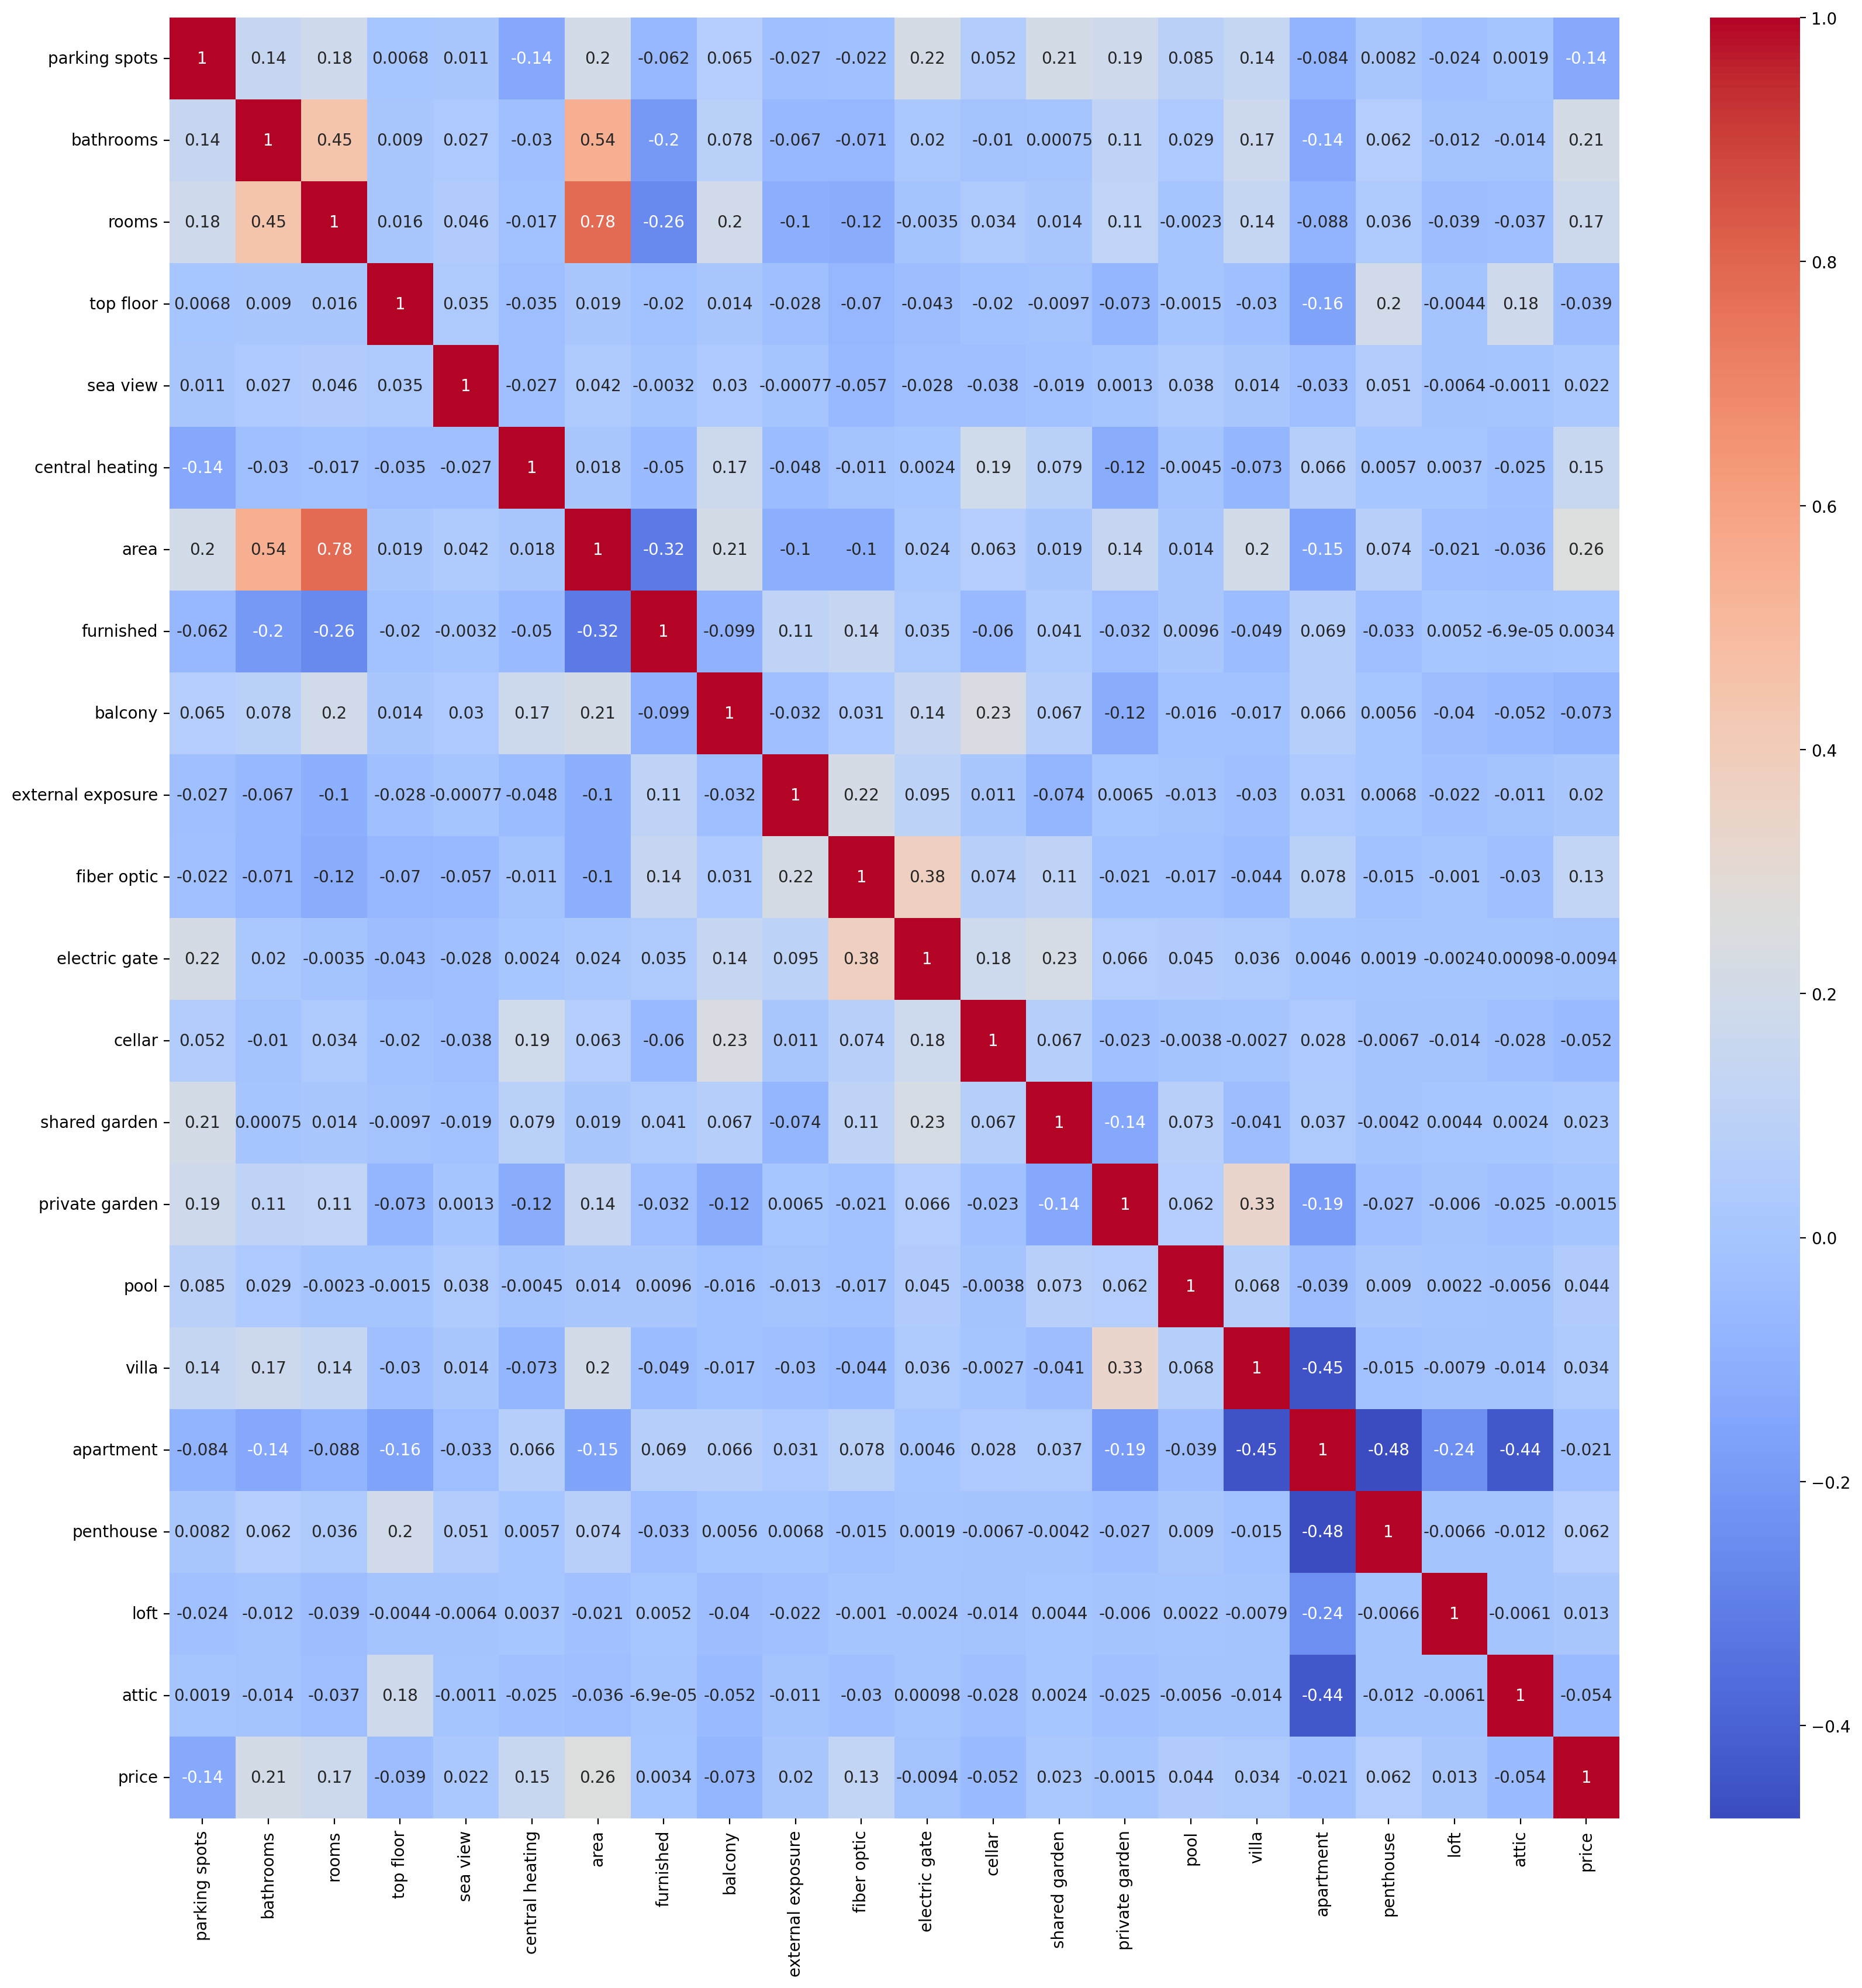

In [386]:
plt.figure(figsize=(20, 20), dpi=200)
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')